Evolutionary dynamics of organised crime and terrorist networks in an network explicit configuration
---

Louis Weyland

In [20]:
"""Importing all the modules."""
import os
import sys
from collections import defaultdict
from typing import Any, DefaultDict, List

import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from IPython.display import IFrame

# Get directory first
path = os.getcwd()
par_dir = os.path.abspath(os.path.join(path, "../../"))
# Import own module
sys.path.append(par_dir)
if True:
    from network_utils.network_converter import NetworkConverter
    from network_utils.network_reader import NetworkReader
    from network_utils.network_stats import NetworkStats
    from simulators.sim_mart_vaq import SimMartVaq
    from utils.plotter import Plotter

In [2]:
# Set plotter
plotter = Plotter()
plotter.args.draw_network = "n"

In [35]:
IFrame("https://www.nature.com/articles/s41598-019-46141-8.pdf", width=1200, height=500)

### Overview of the data

In [36]:
IFrame("https://arxiv.org/pdf/2003.05303.pdf", width=1000, height=500)

In [3]:
# Get stats about network_obj
nx_network = NetworkReader().get_data("montagna_calls")
nk_network = NetworkConverter.nx_to_nk(nx_network)
network_stats = NetworkStats(nk_network)
network_stats.get_overview()

/home/louis/anaconda3/envs/criminal_env/lib/python3.8/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Graph must be connected! Otherwise distance == inf


----------------------------
Network Properties:
nodes, edges			95, 120
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026876
clustering coefficient		0.116725
min/max/avg degree		1, 25, 2.526316
degree assortativity		-0.074455
number of connected components	5
size of largest component	84 (88.42 %)
Communities detected in 0.00182 [s]
solution properties:
-------------------  ---------
# communities         9
min community size    2
max community size   23
avg. community size  10.5556
modularity            0.631285
-------------------  ---------
Calculating best minimal value for power law fit


----------------------------


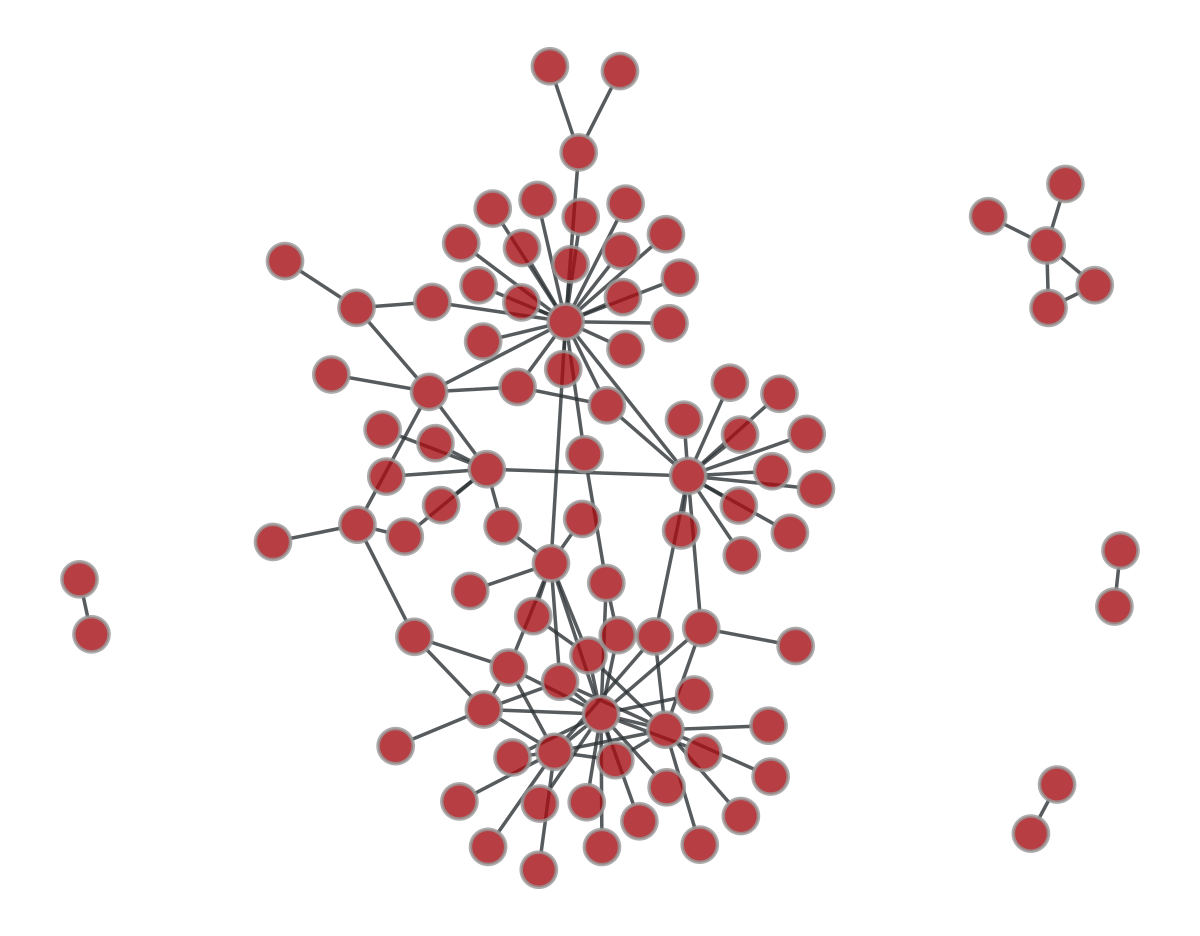

In [4]:
# Plot the network
gt_network = NetworkConverter.nx_to_gt(nx_network)
plotter.draw_network(gt_network)

Calculating best minimal value for power law fit
is_powerlaw=(False, 2.6963785729521623)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


<AxesSubplot:xlabel='Degree', ylabel='Count'>

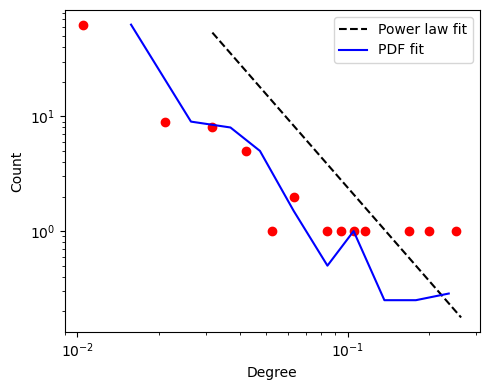

In [5]:
# Plot degree distribution
is_powerlaw = network_stats.check_if_powerlaw(network_stats.get_degree_distribution())
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    network_stats.get_degree_distribution(), x_label="Degree", y_label="Count"
)

### Building around the data by using preferential attachment

Adding nodes to existing network using preferential attachment...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 855/855 [00:00<00:00, 7733.46it/s]
Adding attributes to nodes: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 855/855 [00:00<00:00, 15098.48it/s]


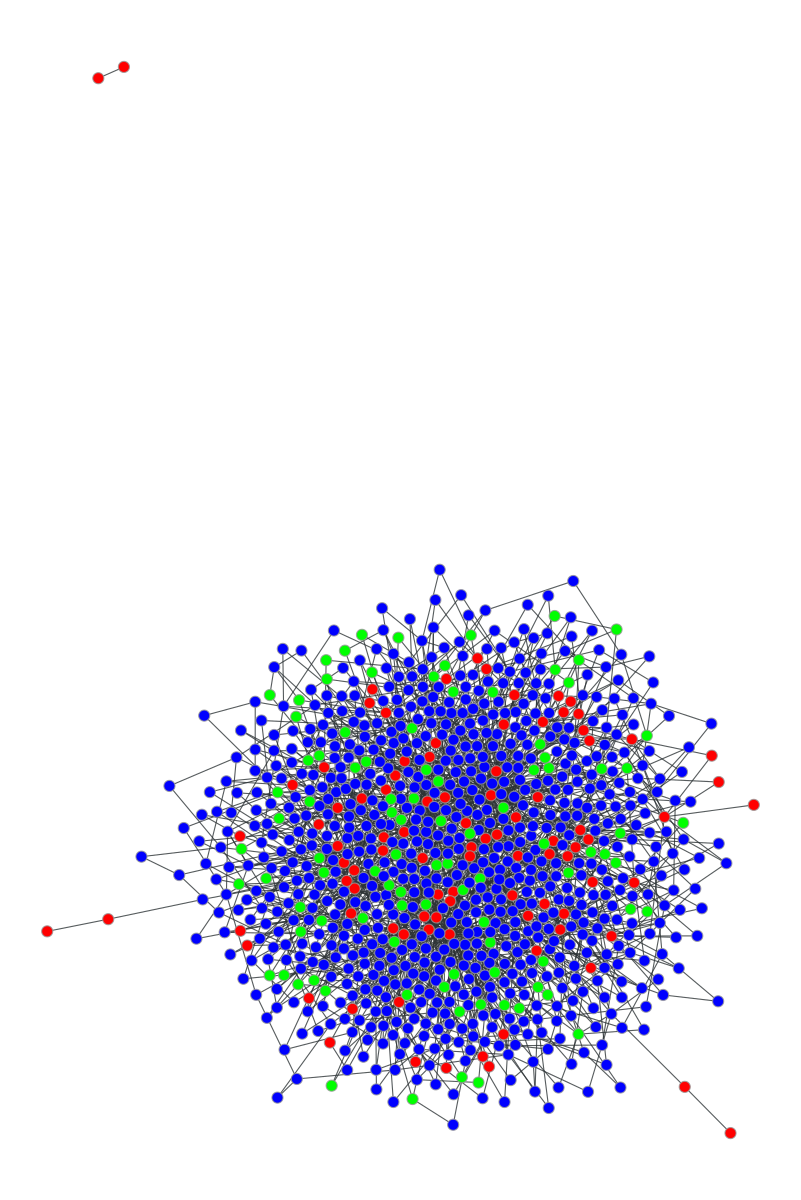

In [6]:
# Adding nodes based on preferential attachment

simulators = SimMartVaq(network=gt_network, ratio_honest=0.8, ratio_wolf=0.1)
simulators.network = simulators.initialise_network(
    network=simulators.network, n_new_edges=2
)
plotter.draw_network(network=simulators.network, color_vertex_property="state_color")

In [8]:
# Get overview of the new network
complete_network_stats = NetworkStats(NetworkConverter.gt_to_nk(simulators.network))
complete_network_stats.get_overview()

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Graph must be connected! Otherwise distance == inf


----------------------------
Network Properties:
nodes, edges			950, 3646
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.008088
clustering coefficient		0.028599
min/max/avg degree		2, 194, 7.675789
degree assortativity		0.187342
number of connected components	2
size of largest component	948 (99.79 %)
Communities detected in 0.00162 [s]
solution properties:
-------------------  ----------
# communities         19
min community size     2
max community size   104
avg. community size   50
modularity             0.540109
-------------------  ----------
Calculating best minimal value for power law fit


----------------------------


Calculating best minimal value for power law fit
is_powerlaw=(False, 3.1151017821510285)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


<AxesSubplot:xlabel='Degree', ylabel='Count'>

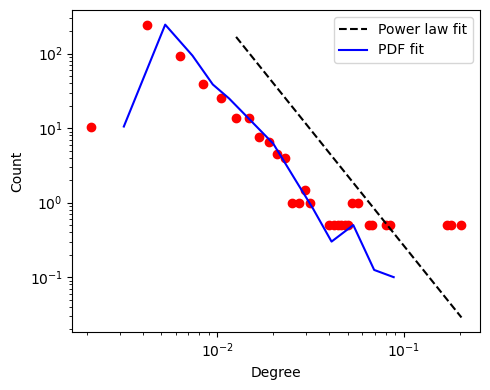

In [9]:
# Plot degree distribution
is_powerlaw = complete_network_stats.check_if_powerlaw(
    complete_network_stats.get_degree_distribution()
)
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    complete_network_stats.get_degree_distribution(), x_label="Degree", y_label="Count"
)

### Dividing the network into groups

Adding nodes to existing network using preferential attachment...: 100%|█| 23/23
Adding attributes to nodes: 100%|█████████████| 23/23 [00:00<00:00, 8431.13it/s]


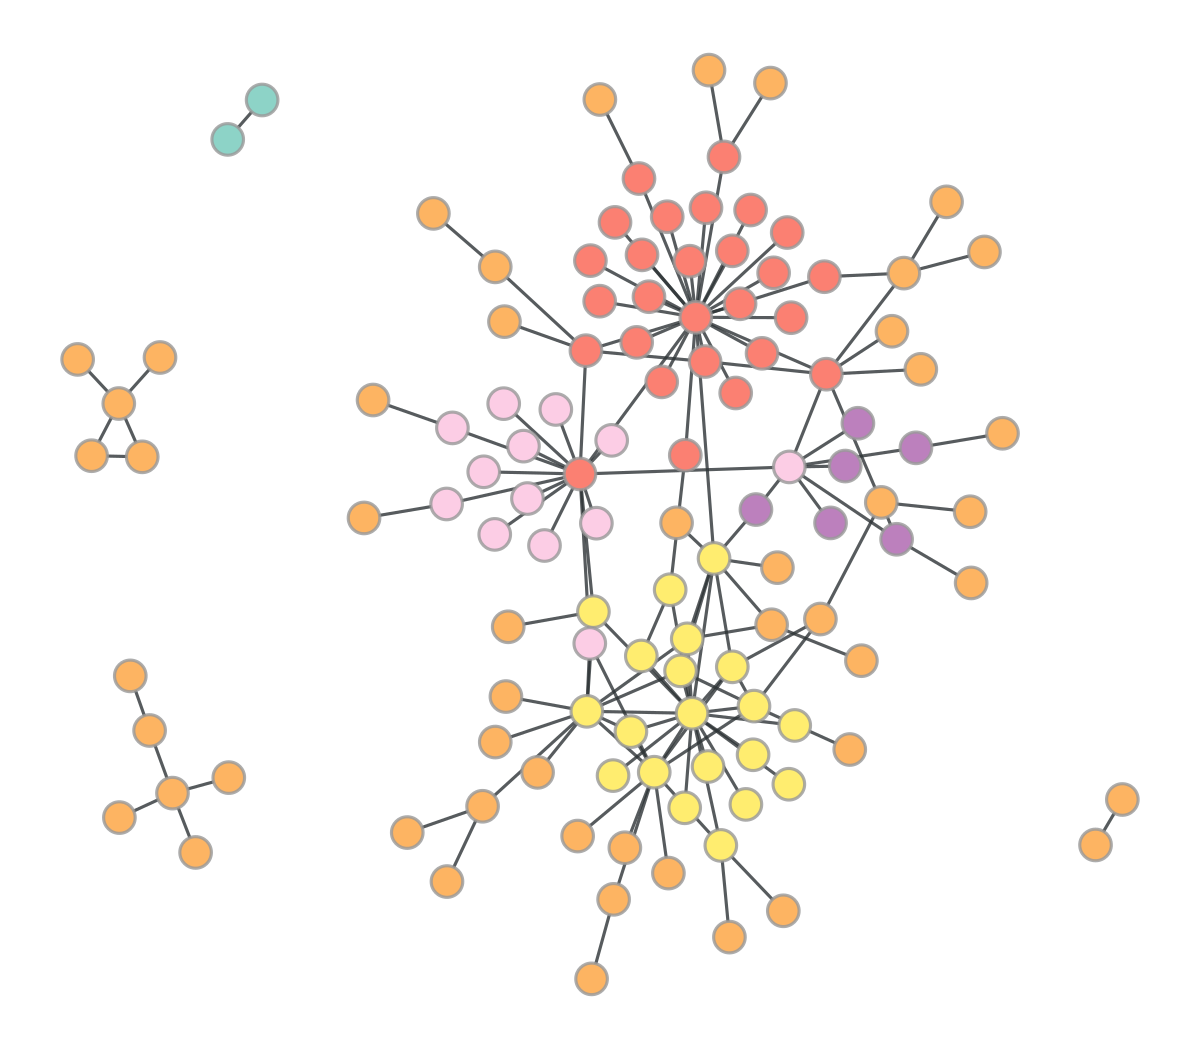

In [9]:
# Dividing network into groups
gt_network = NetworkConverter.nx_to_gt(nx_network)
simulators = SimMartVaq(network=gt_network, ratio_honest=0.1, ratio_wolf=0.1)
simulators.network = simulators.initialise_network(
    network=simulators.network, n_new_edges=1
)
group_dict = simulators.select_multiple_communities(
    simulators.network, radius=2, min_grp=5, max_grp=6
)
color_code = simulators.network.new_vertex_property("int")
simulators.network.vertex_properties["group_color"] = color_code
for k, v in group_dict.items():
    for mbr in v:
        simulators.network.vp.group_color[simulators.network.vertex(mbr)] = k
plotter.draw_network(simulators.network, color_vertex_property="group_color")

,sumsquare_error,aic,bic,kl_div
gamma,0.000056,1457.112354,-12317.408265,inf
chi2,0.000056,1457.112421,-12317.408217,inf
rayleigh,0.000061,1480.568963,-12268.333480,inf
norm,0.000070,1518.803187,-12160.536075,inf
cauchy,0.000088,1505.829084,-11993.208479,inf


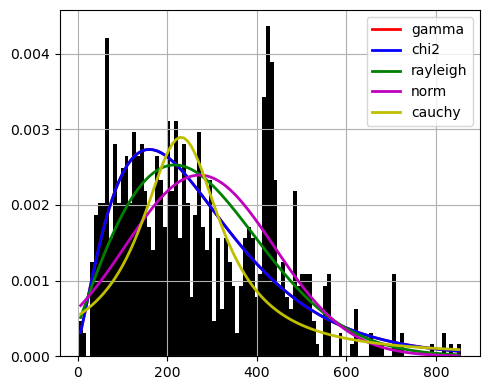

In [22]:
# Get distribution of the groups

group_size_data_collector = defaultdict(list)  # type: DefaultDict[str, List[Any]]
group_size_data_collector["group_size"]
for i in range(0, 100):
    group_dict = simulators.select_multiple_communities(
        simulators.network, radius=3, min_grp=5, max_grp=10
    )
    for k, v in group_dict.items():
        group_size_data_collector["group_size"].append(len(v))
plotter.plot_hist(
    dict_data=group_size_data_collector,
    data_to_plot=["group_size"],
    xlabel="Group Size",
    ylabel="Count",
    title="Group size distribution",
    n_bins=150,
)
f = Fitter(
    group_size_data_collector["group_size"], distributions=get_common_distributions()
)
f.fit()
f.summary()

### Run simulation

In [45]:
SimMartVaq.__init__?

In [46]:
# Run simulation
gt_network = NetworkConverter.nx_to_gt(nx_network)
simulators = SimMartVaq(network=gt_network, ratio_honest=0.65, ratio_wolf=0.15)
network, data_collector = simulators.play(network=simulators.network, rounds=2000)
# Show the data

Adding nodes to existing network using preferential attachment...: 100%|█████████████████████████████████████████████████████████████| 380/380 [00:00<00:00, 16336.31it/s]
Playing the rounds...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:58<00:00, 34.07it/s]


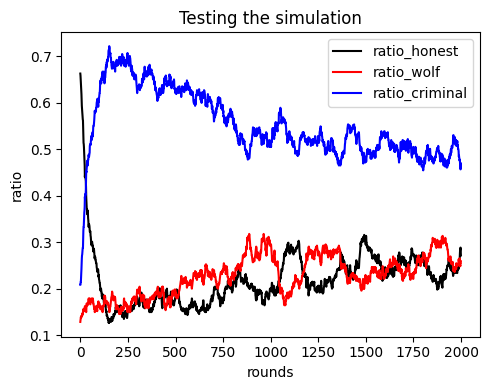

In [47]:
ax_0 = plotter.plot_lines(
    dict_data=data_collector,
    data_to_plot=["ratio_honest", "ratio_wolf", "ratio_criminal"],
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="ratio",
)

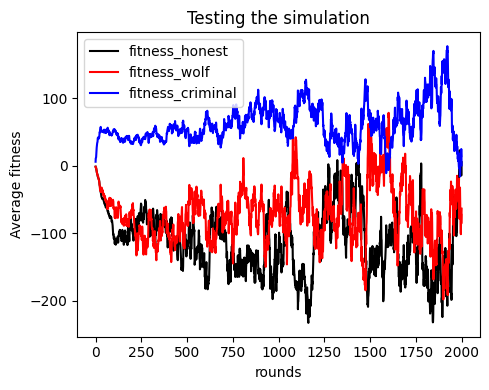

In [48]:
ax_1 = plotter.plot_lines(
    dict_data=data_collector,
    data_to_plot=["fitness_honest", "fitness_wolf", "fitness_criminal"],
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="Average fitness",
)

In [15]:
# Run simulation 2
gt_network = NetworkConverter.nx_to_gt(nx_network)
simulators = SimMartVaq(
    network=gt_network,
    ratio_honest=0.45,
    ratio_wolf=0.45,
    delta=0.8,  # no acting for wolfs
    gamma=0.5,
    tau=2,  # no fintess sharing between wolfd to criminal
    beta_s=5000,
    beta_h=10000,
    beta_c=10,
    c_c=10,  # no benefits from criminals/ they still act
    r_c=10,
    c_w=10,
    r_w=10,
    mutation_prob=0.2,  # only fermi function
)
network, data_collector = simulators.play(
    network=simulators.network, rounds=1000, radius=3
)

Adding nodes to existing network using preferential attachment...: 100%|█| 854/8
Playing the rounds...:   0%|                           | 0/1000 [00:00<?, ?it/s]/home/louis/Documents/git/criminal_network_analysis/src/simulators/sim_mart_vaq.py:658: RuntimeWarning: overflow encountered in exp
  prob = 1 / (np.exp(-(w_j - w_i) / self.temperature) + 1)
Playing the rounds...: 100%|████████████████| 1000/1000 [01:13<00:00, 13.68it/s]


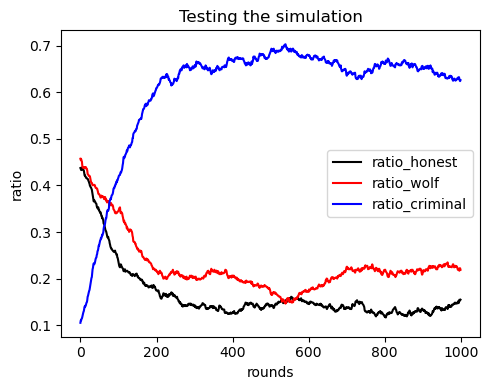

In [16]:
# Show the data
ax_0 = plotter.plot_lines(
    dict_data=data_collector,
    data_to_plot=["ratio_honest", "ratio_wolf", "ratio_criminal"],
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="ratio",
)

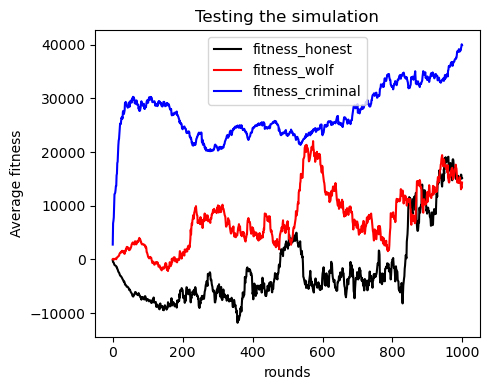

In [17]:
ax_1 = plotter.plot_lines(
    dict_data=data_collector,
    data_to_plot=["fitness_honest", "fitness_wolf", "fitness_criminal"],
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="Average fitness",
)
plt.show()